# EMTAB7365 -preprocessing
## Xiaonan Wang
## 28May2022

In [1]:
#%matplotlib nbagg
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
from os import listdir
from os.path import isfile, join
import re
import anndata
import seaborn as sns

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()

from matplotlib.colors import LinearSegmentedColormap
cmap = LinearSegmentedColormap.from_list(name='gene_cmap', colors=['lightgrey', 'thistle', 'red', 'darkred']) 

sc.settings.set_figure_params(dpi=80, color_map='viridis', vector_friendly=False,  dpi_save=300)

scanpy==1.7.1 anndata==0.7.5 umap==0.5.1 numpy==1.19.5 scipy==1.5.4 pandas==1.1.5 scikit-learn==0.24.1 statsmodels==0.12.2 python-igraph==0.9.0 leidenalg==0.8.3


# Data in

In [2]:
FileDir = '/nfs01data1/Groups/Wangxiaonan/share/rev_MI/EMTAB7365/'

In [3]:
adata1 = sc.read(FileDir+'./SP_replicate1_counts.txt', cache=True).T
print(adata1.shape)
print(adata1.var_names[0:2])
print(adata1.obs_names[0:2])

... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-EMTAB7365-SP_replicate1_counts.h5ad


(64, 48321)
Index(['0610006L08Rik', '0610007P14Rik'], dtype='object')
Index(['SP_replicate1_cell_064', 'SP_replicate1_cell_083'], dtype='object')


In [4]:
adata2 = sc.read(FileDir+'./SP_replicate2_counts.txt', cache=True).T
print(adata2.shape)
print(adata2.var_names[0:2])
print(adata2.obs_names[0:2])

... reading from cache file cache/nfs01data1-Groups-Wangxiaonan-share-rev_MI-EMTAB7365-SP_replicate2_counts.h5ad


(62, 48321)
Index(['0610006L08Rik', '0610007P14Rik'], dtype='object')
Index(['SP_replicate2_Cell_133', 'SP_replicate2_Cell_140'], dtype='object')


In [5]:
adata = adata1.concatenate(adata2, index_unique=None) 
print(adata.shape)

(126, 48321)


In [88]:
print(adata.obs_names[0:3])

Index(['SP_replicate1_cell_083', 'SP_replicate1_cell_098'], dtype='object')


In [7]:
meta = pd.read_csv(FileDir + './E-MTAB-7365.sdrf.txt', index_col=0, sep='\t')
print(meta.shape)
print(meta.columns)

(252, 48)
Index(['Comment[ENA_SAMPLE]', 'Comment[BioSD_SAMPLE]',
       'Characteristics[organism]', 'Characteristics[strain]',
       'Characteristics[age]', 'Unit[time unit]',
       'Characteristics[developmental stage]', 'Characteristics[sex]',
       'Characteristics[organism part]', 'Characteristics[genotype]',
       'Characteristics[phenotype]', 'Characteristics[disease]',
       'Characteristics[single cell well quality]',
       'Characteristics[post analysis well quality]',
       'Characteristics[single cell quality]', 'Material Type', 'Protocol REF',
       'Protocol REF.1', 'Protocol REF.2', 'Extract Name',
       'Comment[LIBRARY_LAYOUT]', 'Comment[LIBRARY_SELECTION]',
       'Comment[LIBRARY_SOURCE]', 'Comment[LIBRARY_STRATEGY]',
       'Comment[LIBRARY_STRAND]', 'Comment[NOMINAL_LENGTH]',
       'Comment[NOMINAL_SDEV]', 'Comment[library construction]',
       'Comment[single cell isolation]', 'Comment[input molecule]',
       'Comment[primer]', 'Comment[end bias]', 'Pr

In [8]:
meta.head(2)

,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[strain],Characteristics[age],Unit[time unit],Characteristics[developmental stage],Characteristics[sex],Characteristics[organism part],Characteristics[genotype],...,Comment[SUBMITTED_FILE_NAME],Comment[ENA_RUN],Comment[FASTQ_URI],Comment[SPOT_LENGTH],Comment[READ_INDEX_1_BASE_COORD],Protocol REF.4,Protocol REF.5,Derived Array Data File,Comment [Derived ArrayExpress FTP file],Factor Value[single cell identifier]
Source Name,,,,,,,,,,,,,,,,,,,,,
SP_replicate1_cell_070,ERS2877853,SAMEA5066649,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,wild type genotype,...,SP_replicate1_Cell_070_Mouse_TAAGGCGA-AAGGAGTA...,ERR2868916,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR286/006/...,250,126,P-MTAB-80388,P-MTAB-80389,SP_replicate1_counts.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,SP_replicate1_cell_070
SP_replicate1_cell_070,ERS2877853,SAMEA5066649,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,wild type genotype,...,SP_replicate1_Cell_070_Mouse_TAAGGCGA-AAGGAGTA...,ERR2868916,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR286/006/...,250,126,P-MTAB-80388,P-MTAB-80389,SP_replicate1_counts.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,SP_replicate1_cell_070


In [9]:
# remove duplicates due to paired end sequencing R1,R2
meta1 = meta.drop_duplicates(subset=['Comment[ENA_SAMPLE]'])

In [10]:
meta1['Characteristics[single cell quality]'].value_counts()

OK              103
OK, filtered     18
not OK            5
Name: Characteristics[single cell quality], dtype: int64

In [11]:
np.setdiff1d(adata.obs_names, meta1.index)

array([], dtype=object)

In [12]:
meta2 = meta1.loc[adata.obs_names,:].copy()

In [13]:
display(meta2.head(2))

,Comment[ENA_SAMPLE],Comment[BioSD_SAMPLE],Characteristics[organism],Characteristics[strain],Characteristics[age],Unit[time unit],Characteristics[developmental stage],Characteristics[sex],Characteristics[organism part],Characteristics[genotype],...,Comment[SUBMITTED_FILE_NAME],Comment[ENA_RUN],Comment[FASTQ_URI],Comment[SPOT_LENGTH],Comment[READ_INDEX_1_BASE_COORD],Protocol REF.4,Protocol REF.5,Derived Array Data File,Comment [Derived ArrayExpress FTP file],Factor Value[single cell identifier]
SP_replicate1_cell_064,ERS2877876,SAMEA5066673,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,wild type genotype,...,SP_replicate1_Cell_064_Mouse_TAAGGCGA-GCGTAAGA...,ERR2868939,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR286/009/...,250,126,P-MTAB-80388,P-MTAB-80389,SP_replicate1_counts.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,SP_replicate1_cell_064
SP_replicate1_cell_083,ERS2877890,SAMEA5066687,Mus musculus,C57BL/6J,8,week,adult,male,cardiac ventricle,wild type genotype,...,SP_replicate1_Cell_083_Mouse_AGGCAGAA-AGAGTAGA...,ERR2868953,ftp://ftp.sra.ebi.ac.uk/vol1/fastq/ERR286/003/...,250,126,P-MTAB-80388,P-MTAB-80389,SP_replicate1_counts.txt,ftp://ftp.ebi.ac.uk/pub/databases/microarray/d...,SP_replicate1_cell_083


In [14]:
# add meta into adata
adata.obs['StudyID'] = 'EMTAB7365'
adata.obs['Genotype'] = 'Pdgfra+/Sca1+/Cd31-'
adata.obs['CellType'] = 'Fibroblasts'
adata.obs['Age'] = 8
adata.obs['Development_stage'] = 'adult'
adata.obs['Strain'] = 'C57BL/6J'
adata.obs['Organism'] = 'Mus musculus'
adata.obs['Gender'] = 'male'
adata.obs['Tissue'] = 'Cardiac ventricle'
adata.obs['Condition'] = 'Normal'
adata.obs['Batch'] = ['EMTAB7365_B'+str(int(x)+1) for x in adata.obs['batch']]

In [15]:
adata.obs['ERR'] = meta2['Comment[ENA_RUN]'].values
adata.obs['QC'] = meta2['Characteristics[single cell quality]'].values

In [16]:
adata.obs.head(2)

,batch,StudyID,Genotype,CellType,Age,Development_stage,Stain,Organism,Gender,Tissue,Condition,Batch,ERR,QC
SP_replicate1_cell_064,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,Normal,EMTAB7365_B1,ERR2868939,OK
SP_replicate1_cell_083,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,Normal,EMTAB7365_B1,ERR2868953,OK


In [17]:
adata = adata[adata.obs['QC'] == 'OK',:].copy()
print(adata.shape)

(103, 48321)


In [18]:
adata.write('./write/EMTAB7365_raw.h5ad')

... storing 'StudyID' as categorical
... storing 'Genotype' as categorical
... storing 'CellType' as categorical
... storing 'Development_stage' as categorical
... storing 'Stain' as categorical
... storing 'Organism' as categorical
... storing 'Gender' as categorical
... storing 'Tissue' as categorical
... storing 'Condition' as categorical
... storing 'Batch' as categorical
... storing 'QC' as categorical


# Further QC

In [19]:
adata = sc.read('./write/EMTAB7365_raw.h5ad')

normalizing counts per cell
    finished (0:00:00)


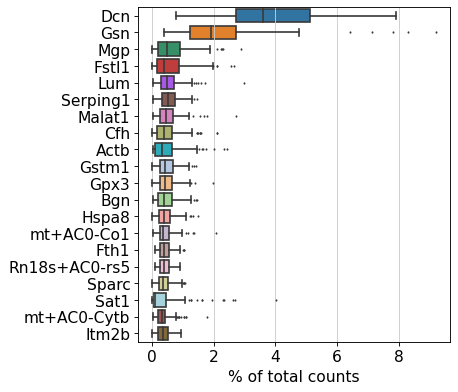

In [20]:
sc.pl.highest_expr_genes(adata, n_top=20)

In [21]:
adata.var['MT'] = adata.var_names.str.startswith('mt+') 

In [22]:
sc.pp.calculate_qc_metrics(adata, qc_vars=['MT'], inplace=True)

In [23]:
adata.obs.head(3)

,batch,StudyID,Genotype,CellType,Age,Development_stage,Stain,Organism,Gender,Tissue,...,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT
SP_replicate1_cell_064,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,...,8.986572,3433015.0,15.048950,28.462241,38.318184,51.639652,75.029908,36367.0,10.501445,1.059331
SP_replicate1_cell_083,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,...,9.075322,2611116.0,14.775289,28.384453,37.561832,50.764501,73.328301,36186.0,10.496455,1.385844
SP_replicate1_cell_098,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,...,8.992930,2620857.0,14.779013,29.177861,40.746176,54.510147,76.711473,24703.0,10.114720,0.942554


5.860786223465865
11.289794413577894
10


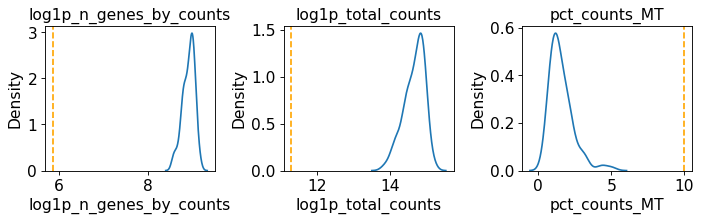

In [24]:
obs_terms = ['log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_MT']
cutoffs = [np.log1p(350),np.log1p(80000),10]
fig,ax = plt.subplots(1,3, figsize=(9,3))
for i in range(len(obs_terms)):
    sns.kdeplot(adata.obs[obs_terms[i]], ax=ax[i])
    ax[i].grid(False)
    ax[i].set_title(obs_terms[i])
    print(cutoffs[i])
    ax[i].axvline(cutoffs[i], c='orange', linestyle='--')
plt.tight_layout()

In [25]:
# Cells look ok, filter out non-expressing genes
sc.pp.filter_genes(adata, min_cells=1)

filtered out 20607 genes that are detected in less than 1 cells


In [26]:
print(adata.shape)

(103, 27714)


In [27]:
adata.write('./write/EMTAB7365_raw.h5ad')

# Normalisation

In [28]:
adata = sc.read('./write/EMTAB7365_raw.h5ad')

In [29]:
# normalisation
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)

normalizing by total count per cell
    finished (0:00:00): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


In [30]:
# log counts
sc.pp.log1p(adata)

In [31]:
adata.raw = adata

In [32]:
adata.write('./write/EMTAB7365_lognorm.h5ad')

# Cell Cycle Assignment

In [33]:
adata = sc.read('./write/EMTAB7365_lognorm.h5ad')

In [34]:
# Scaling must be done before scoring
sc.pp.scale(adata)

In [35]:
cell_cycle_genes = [x.strip()[0].upper()+x.strip()[1:].lower() for x in open('/nfs01data1/Groups/Wangxiaonan/Lab_members/Files/regev_lab_cell_cycle_genes.txt')]
print(len(cell_cycle_genes))

97


In [36]:
np.setdiff1d(cell_cycle_genes, adata.raw.var_names)

array(['Aurka', 'Bub1', 'Cdc20', 'Cenpe', 'Dscc1', 'Ect2', 'Fam64a',
       'Fen1', 'Kif23', 'Mki67', 'Mlf1ip', 'Rad51', 'Ung'], dtype='<U8')

In [37]:
s_genes = cell_cycle_genes[:43]
g2m_genes = cell_cycle_genes[43:]
print('Number of s_genes: '+str(len(s_genes)))
print('Number of g2m_genes: '+str(len(g2m_genes)))
print('Total number of cell cycle genes: '+str(len(cell_cycle_genes)))

Number of s_genes: 43
Number of g2m_genes: 54
Total number of cell cycle genes: 97


In [38]:
sc.tl.score_genes_cell_cycle(adata, s_genes=s_genes, g2m_genes=g2m_genes, use_raw=False)

calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    816 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    944 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)


In [39]:
adata.obs['phase'].value_counts().sort_index()

G1     35
G2M    33
S      35
Name: phase, dtype: int64

In [40]:
# save cell cycle assignments
adata.obs[['phase', 'S_score', 'G2M_score']].to_csv('cell_cycle_results.txt')

# Select Highly Variable Genes

In [41]:
adata = sc.read('./write/EMTAB7365_lognorm.h5ad')

In [42]:
cell_cycle_results = pd.read_csv('cell_cycle_results.txt', index_col=0)
adata.obs = pd.concat([adata.obs, cell_cycle_results], axis=1)

In [43]:
adata.obs.head(3)

,batch,StudyID,Genotype,CellType,Age,Development_stage,Stain,Organism,Gender,Tissue,...,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_MT,log1p_total_counts_MT,pct_counts_MT,n_counts,phase,S_score,G2M_score
SP_replicate1_cell_064,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,...,38.318184,51.639652,75.029908,36367.0,10.501445,1.059331,3433015.0,S,0.109186,-0.053810
SP_replicate1_cell_083,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,...,37.561832,50.764501,73.328301,36186.0,10.496455,1.385844,2611116.0,S,0.034482,-0.012640
SP_replicate1_cell_098,0,EMTAB7365,Pdgfra+/Sca1+/Cd31-,Fibroblasts,8,adult,C57BL/6J,Mus musculus,male,Cardiac ventricle,...,40.746176,54.510147,76.711473,24703.0,10.114720,0.942554,2620857.0,G2M,-0.245621,0.136052


In [44]:
# find highly variable genes
# parameters are mainly selected depends on user preference
sc.pp.highly_variable_genes(
    adata, min_mean=0.02, max_mean=3, min_disp=0.3, batch_key='batch', inplace=True)

extracting highly variable genes
... storing 'phase' as categorical
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


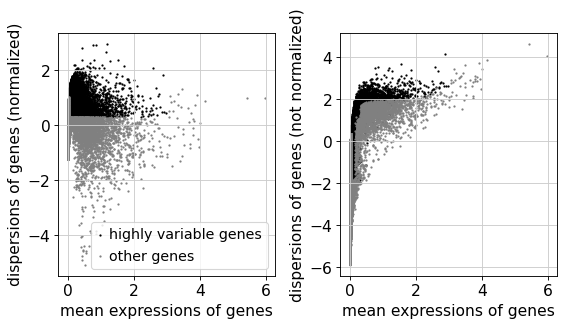

In [45]:
sc.pl.highly_variable_genes(adata)

In [46]:
print(np.sum(adata.var.highly_variable))

8228


In [47]:
adata = adata[:, adata.var.highly_variable].copy()

In [48]:
adata.shape

(103, 8228)

In [49]:
adata.write('./write/EMTAB7365_lognorm_hvg.h5ad')

# Preliminary Processing

In [50]:
adata = sc.read('./write/EMTAB7365_lognorm_hvg.h5ad')

In [51]:
print(adata.obs_keys())

['batch', 'StudyID', 'Genotype', 'CellType', 'Age', 'Development_stage', 'Stain', 'Organism', 'Gender', 'Tissue', 'Condition', 'Batch', 'ERR', 'QC', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'phase', 'S_score', 'G2M_score']


In [52]:
# normally regress out the top layers of unwanted effects
sc.pp.regress_out(adata, ['total_counts','n_genes_by_counts', 'pct_counts_MT'])

regressing out ['total_counts', 'n_genes_by_counts', 'pct_counts_MT']
    finished (0:00:13)


In [53]:
# scale for pca
sc.pp.scale(adata)
# pca
sc.tl.pca(adata, svd_solver='arpack')

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:00)


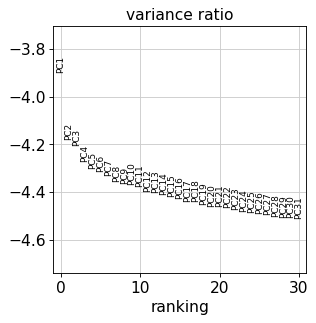

In [54]:
sc.pl.pca_variance_ratio(adata, log=True)

In [55]:
sc.pp.neighbors(adata, n_neighbors=5, n_pcs=10)

computing neighbors
    using 'X_pca' with n_pcs = 10
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:02)


In [56]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


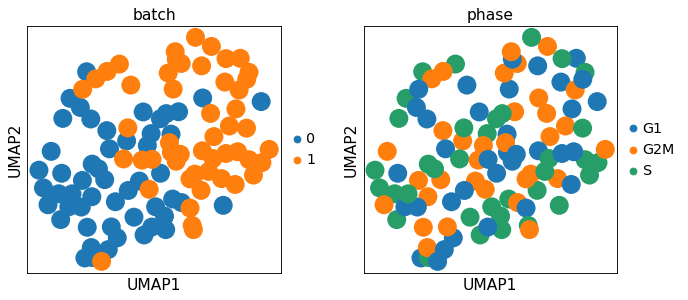

In [57]:
sc.pl.umap(adata, color= ['batch', 'phase'])

In [89]:
adata

AnnData object with n_obs × n_vars = 103 × 8228
    obs: 'batch', 'StudyID', 'Genotype', 'CellType', 'Age', 'Development_stage', 'Organism', 'Gender', 'Tissue', 'Condition', 'Batch', 'ERR', 'QC', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_MT', 'log1p_total_counts_MT', 'pct_counts_MT', 'n_counts', 'phase', 'S_score', 'G2M_score', 'Strain', 'Day', 'Index'
    var: 'MT', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection', 'mean', 'std'
    uns: 'batch_colors', 'hvg', 'neighbors', 'pca', 'phase_colors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances'

In [62]:
adata.write('./write/EMTAB7365_processed.h5ad')

# Further modify

In [63]:
adata = sc.read('./write/EMTAB7365_processed.h5ad')

In [65]:
adata.obs['Day'] = 0

In [67]:
adata.obs['Age'] = adata.obs['Age'].astype(int)

In [69]:
adata.obs['Development_stage'].value_counts()

adult    103
Name: Development_stage, dtype: int64

In [70]:
adata.obs['Genotype'].value_counts()

Pdgfra+/Sca1+/Cd31-    103
Name: Genotype, dtype: int64

In [71]:
adata.obs['CellType'].value_counts()

Fibroblasts    103
Name: CellType, dtype: int64

In [72]:
adata.obs['StudyID'].value_counts()

EMTAB7365    103
Name: StudyID, dtype: int64

In [73]:
adata.obs['ERR'].value_counts()

ERR2868971    1
ERR2868954    1
ERR2868997    1
ERR2869033    1
ERR2868964    1
             ..
ERR2869036    1
ERR2868983    1
ERR2868949    1
ERR2868961    1
ERR2868972    1
Name: ERR, Length: 103, dtype: int64

In [75]:
adata.obs['Index'] = adata.obs['Batch']

In [76]:
adata.obs['Index'].value_counts()

EMTAB7365_B1    52
EMTAB7365_B2    51
Name: Index, dtype: int64

In [77]:
adata.obs['Tissue'].value_counts()

Cardiac ventricle    103
Name: Tissue, dtype: int64

In [79]:
adata.obs['Tissue'] = 'ventricle'

In [80]:
adata.obs['Tissue'].value_counts()

ventricle    103
Name: Tissue, dtype: int64

In [78]:
adata.obs['Condition'].value_counts()

Normal    103
Name: Condition, dtype: int64

In [81]:
adata.write('./write/EMTAB7365_processed.h5ad')

... storing 'Tissue' as categorical
